<a href="https://colab.research.google.com/github/ShashankKamath/DecisionTree_ML/blob/master/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()


Saving hw2_question1.csv to hw2_question1.csv


Splitting the data into Train and Test


In [0]:
import pandas as pd
import numpy as np
data = pd.read_csv("hw2_extra.csv")
train_set=data.values.tolist()
header=["Temperature","Humidity","Sky_Condition","Rainy"]

In [0]:
# import pandas as pd
# import numpy as np
# from sklearn.utils import shuffle
# data = pd.read_csv("hw2_question1.csv")
# header=["Thickness", "Cellsize", "Cellshape", "Adhesion","Ecellsize","Nuclei","Chromatin","Nucleoli","Mitosis","Class"]
# data.columns=header
# data=shuffle(data)
# data=data.reset_index(drop=True)
# #   data = data.sample(frac=1).reset_index(drop=True)
# train_data=pd.DataFrame()
# test_data=pd.DataFrame()
# class_2_count=[295,148]
# class_4_count=[159,80]
# for i in range(0,data.shape[0]):
#     if(data.loc[i,'Class']==2 and class_2_count[0]<=295 and class_2_count[0]>0):
#         train_data=train_data.append(data.iloc[i])
#         class_2_count[0]-=1
#     if(data.loc[i,'Class']==4 and class_4_count[0]<=159 and class_4_count[0]>0):
#         train_data=train_data.append(data.iloc[i])
#         class_4_count[0]-=1
#     if(data.loc[i,'Class']==2 and class_2_count[1]<=148 and class_2_count[1]>0):
#         test_data=test_data.append(data.iloc[i])
#         class_2_count[1]-=1
#     if(data.loc[i,'Class']==4 and class_4_count[1]<=80 and class_4_count[1]>0):
#         test_data=test_data.append(data.iloc[i])
#         class_4_count[1]-=1
# train_data=train_data[header]
# test_data=test_data[header]
# data_set=data.values.tolist()
# train_set=train_data.values.tolist()
# test_set=test_data.values.tolist()

In [0]:
def unique_vals(rows, col):
    return set([row[col] for row in rows])

In [0]:
def class_counts(rows):
    counts = {} 
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [0]:
def is_numeric(value):
    return isinstance(value, int) or isinstance(value, float)

In [0]:
class Question:
    def __init__(self, column, value):
        self.column = column
        self.value = value
    def match(self, example):
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
    def __repr__(self):
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (header[self.column], condition, str(self.value))

In [0]:
def partition(rows, question):
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [0]:
def gini(rows):
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity 

In [0]:
import math
def entropy(rows):
    counts = class_counts(rows)
    impurity = 0
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl*math.log2(prob_of_lbl)
    return impurity

In [0]:
def info_gain(left, right, current_uncertainty):
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [0]:
def find_best_split(rows):
    best_gain = 0  
    best_question = None 
    current_uncertainty = gini(rows)
#     current_uncertainty = entropy(rows)
    n_features = len(rows[0]) - 1  
    for col in range(n_features): 
        values = set([row[col] for row in rows])  
        for val in values:  
            question = Question(col, val)
            true_rows, false_rows = partition(rows, question)
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
            gain = info_gain(true_rows, false_rows, current_uncertainty)
#             print("Question and gain:",question,gain)
            if gain >= best_gain:
                best_gain, best_question = gain, question
#     print("Best Question: ",best_question)
#     print("Best Gain: ", best_gain)
    return best_gain, best_question

In [0]:
class Leaf:
    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [0]:
class Decision_Node:
    def __init__(self,
                 question,
                 true_branch,
                 false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [0]:
def print_tree(node, spacing=""):
    if isinstance(node, Leaf):
        print (spacing + "Predict", node.predictions)
        return
    print (spacing + str(node.question))
    print (spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")
    print (spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [0]:
def build_tree(rows,max_depth,depth):
#     print("Depth: ",depth)
    gain, question = find_best_split(rows)
    if gain == 0 or depth>=max_depth:
#         print("Created Leaf Node")
        depth=depth-1
        return Leaf(rows)
    if depth<max_depth:
      true_rows, false_rows = partition(rows, question)
#       print("Creating True Branch")
      true_branch = build_tree(true_rows,max_depth,depth+1)
#       print("Creating False Branch")
      false_branch = build_tree(false_rows,max_depth,depth+1)
      depth=depth-1
      return Decision_Node(question, true_branch, false_branch)

Predicting the Class

In [0]:
def classify(row, node):
    if isinstance(node, Leaf):
        return node.predictions
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [0]:
import operator
def test_correct(counts):
    total = sum(counts.values()) * 1.0
    probs = {} 
    for lbl in counts.keys():
        probs[lbl] = int(counts[lbl] / total * 100)
    predicted_class=max(probs.items(), key=operator.itemgetter(1))[0] 
    return predicted_class

In [0]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
def data_generate(data):
  data=shuffle(data)
  data=data.reset_index(drop=True)
  train_data=pd.DataFrame()
  test_data=pd.DataFrame()
  class_2_count=[295,148]
  class_4_count=[159,80]
  for i in range(0,data.shape[0]):
      if(data.loc[i,'Class']==2 and class_2_count[0]<=295 and class_2_count[0]>0):
          train_data=train_data.append(data.iloc[i])
          class_2_count[0]-=1
      if(data.loc[i,'Class']==4 and class_4_count[0]<=159 and class_4_count[0]>0):
          train_data=train_data.append(data.iloc[i])
          class_4_count[0]-=1
      if(data.loc[i,'Class']==2 and class_2_count[1]<=148 and class_2_count[1]>0):
          test_data=test_data.append(data.iloc[i])
          class_2_count[1]-=1
      if(data.loc[i,'Class']==4 and class_4_count[1]<=80 and class_4_count[1]>0):
          test_data=test_data.append(data.iloc[i])
          class_4_count[1]-=1
  train_data=train_data[header]
  test_data=test_data[header]
  data_set=data.values.tolist()
  train_set=train_data.values.tolist()
  test_set=test_data.values.tolist()
  return data_set,train_set,test_set

In [0]:
import math
from random import seed
accuracy=[]
max_depth=5
num_of_simulations=5
data = pd.read_csv("hw2_question1.csv")
header=["Thickness", "Cellsize", "Cellshape", "Adhesion","Ecellsize","Nuclei","Chromatin","Nucleoli","Mitosis","Class"]
data.columns=header
for i in range(0,num_of_simulations):
  accuracy.append([])
  seed(i)
  data_set,train_set,test_set=data_generate(data)
  for depth in range(0,max_depth):
    my_tree=build_tree(train_set,depth,0)
    # print_tree(my_tree)
    accuracy[i].append(0)
    for row in test_set:
      if row[-1]==test_correct(classify(row, my_tree)):
         accuracy[i][depth]+=1
    accuracy[i][depth]=(accuracy[i][depth]/len(test_set))*100
# print("Accuracy: ",accuracy)

final_accuracy=[]
for depth in range(max_depth):
  score=0
  for i in range(num_of_simulations):
    score+=accuracy[i][depth]
  score=score/num_of_simulations
  final_accuracy.append(score)
  
print("Final Accuracy:",final_accuracy)
print_tree(my_tree)

BONUS PART

In [0]:
def build_tree(rows,max_depth,depth,gain_t):
#     print("Depth: ",depth)
    gain, question = find_best_split(rows)
    if gain == 0 or gain<gain_t or depth>=max_depth:
#         print("Created Leaf Node")
        depth=depth-1
        return Leaf(rows)
    if depth<max_depth:
      true_rows, false_rows = partition(rows, question)
#       print("Creating True Branch")
      true_branch = build_tree(true_rows,max_depth,depth+1,gain_t)
#       print("Creating False Branch")
      false_branch = build_tree(false_rows,max_depth,depth+1,gain_t)
      depth=depth-1
      return Decision_Node(question, true_branch, false_branch)

In [0]:
import math
from random import seed
accuracy=[]
max_depth=5
# num_of_simulations=5
data = pd.read_csv("hw2_question1.csv")
header=["Thickness", "Cellsize", "Cellshape", "Adhesion","Ecellsize","Nuclei","Chromatin","Nucleoli","Mitosis","Class"]
data.columns=header
gain_threshold=list(np.arange(0.1,1,0.1))
# gain_threshold=[0.01,0.02]
for gain_v in range(len(gain_threshold)):
  accuracy.append([])
#   seed(i)
  data_set,train_set,test_set=data_generate(data)
  
  for depth in range(0,max_depth):
    my_tree=build_tree(train_set,depth,0,gain_threshold[gain_v])
#     print_tree(my_tree)
    accuracy[gain_v].append(0)
    for row in test_set:
      if row[-1]==test_correct(classify(row, my_tree)):
         accuracy[gain_v][depth]+=1
    accuracy[gain_v][depth]=(accuracy[gain_v][depth]/len(test_set))*100
# print("Accuracy: ",accuracy)

# final_accuracy=[]
# for depth in range(max_depth):
#   score=0
#   for i in range(num_of_simulations):
#     score+=accuracy[i][depth]
#   score=score/num_of_simulations
#   final_accuracy.append(score)
  
# print("Final Accuracy:",final_accuracy)
# print_tree(my_tree)

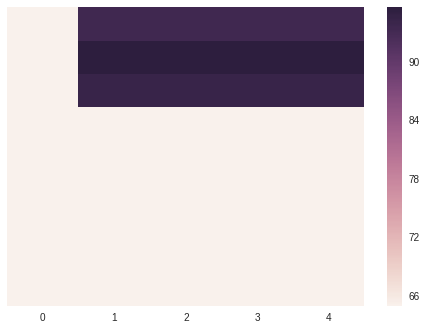

In [49]:
import seaborn
import matplotlib.pyplot as plt
a=seaborn.heatmap(accuracy,yticklabels=False)

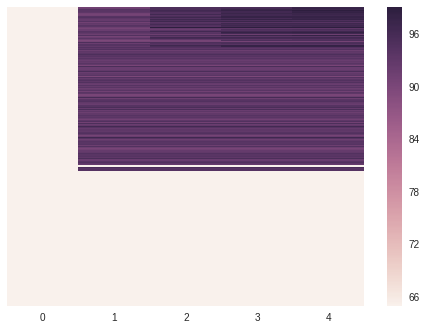

In [44]:
import seaborn
import matplotlib.pyplot as plt
a=seaborn.heatmap(accuracy,yticklabels=False)

WITHOUT BONUS RESULTS



Test Set 


**Entropy**


num_of_sim =10
Final Accuracy: [64.9122807017544, 92.4561403508772, 95.48245614035088, 97.19298245614034, 98.24561403508771, 98.85964912280701, 99.56140350877195, 99.64912280701756, 99.91228070175438, 100.0]

num_of_sim =20
Final Accuracy: [64.91228070175438, 93.70614035087719, 95.8991228070175, 97.23684210526315, 98.02631578947371, 98.81578947368423, 99.3421052631579, 99.69298245614036, 99.9342105263158, 99.95614035087719]

num_of_sim =30
Final Accuracy: [64.91228070175436, 92.6608187134503, 95.14619883040938, 97.10526315789475, 97.8508771929825, 98.65497076023395, 99.3421052631579, 99.67836257309942, 99.89766081871345, 99.97076023391813]

num_of_sim =40
Final Accuracy: [64.91228070175434, 93.08114035087718, 95.48245614035093, 96.88596491228077, 97.92763157894741, 98.67324561403511, 99.37500000000003, 99.79166666666667, 99.9342105263158, 99.9780701754386]

num_of_sim =50
Final Accuracy: [64.91228070175434, 93.41228070175441, 95.82456140350884, 97.27192982456145, 98.03508771929828, 98.85964912280704, 99.33333333333336, 99.640350877193, 99.92105263157895, 99.98245614035088]



**Gini**


num_of_sim =10
Final Accuracy: [64.9122807017544, 93.0263157894737, 95.39473684210527, 97.23684210526315, 98.15789473684211, 98.99122807017544, 99.60526315789474, 99.82456140350878, 99.91228070175438, 99.95614035087719]

num_of_sim =20
Final Accuracy: [64.91228070175438, 92.89473684210529, 95.7456140350877, 97.19298245614034, 98.15789473684214, 99.01315789473686, 99.51754385964914, 99.75877192982458, 99.95614035087719, 100.0]

num_of_sim =30
Final Accuracy: [64.91228070175436, 93.18713450292398, 95.40935672514621, 96.827485380117, 97.86549707602343, 98.65497076023395, 99.32748538011697, 99.64912280701756, 99.83918128654972, 99.95614035087719]

num_of_sim =40
Final Accuracy: [64.91228070175434, 93.28947368421049, 95.88815789473689, 97.30263157894743, 98.25657894736847, 98.92543859649126, 99.41885964912282, 99.81359649122808, 99.91228070175438, 99.95614035087719]

num_of_sim =50
Final Accuracy: [64.91228070175434, 92.90350877192981, 95.6491228070176, 97.23684210526322, 98.14035087719303, 98.74561403508777, 99.33333333333336, 99.7280701754386, 99.87719298245615, 99.94736842105263]


Train Set 


Entropy


num_of_sim =5
Final Accuracy: [64.97797356828194, 92.81938325991189, 94.84581497797356, 97.04845814977973, 98.06167400881057, 98.81057268722466, 99.33920704845816, 99.77973568281936, 99.91189427312774, 100.0]


num_of_sim =10
Final Accuracy: [64.97797356828195, 92.75330396475769, 95.30837004405285, 96.93832599118943, 98.03964757709251, 98.76651982378854, 99.38325991189427, 99.80176211453742, 99.9339207048458, 99.97797356828194]

num_of_sim =20
Final Accuracy: [64.97797356828194, 93.32599118942733, 95.67180616740089, 97.11453744493393, 97.95154185022028, 98.77753303964758, 99.35022026431716, 99.73568281938324, 99.90088105726872, 99.9669603524229]


num_of_sim =30
Final Accuracy: [64.97797356828191, 93.04698972099852, 95.50660792951541, 97.1145374449339, 98.0029368575624, 98.7885462555066, 99.28046989720998, 99.66226138032307, 99.8898678414097, 99.95594713656389]


num_of_sim =40
Final Accuracy: [64.9779735682819, 93.36453744493393, 95.82048458149778, 97.20264317180617, 98.08370044052862, 98.77202643171806, 99.3502202643172, 99.71365638766524, 99.9229074889868, 99.97246696035242]

num_of_sim =50
Final Accuracy: [64.9779735682819, 93.18061674008811, 95.66079295154188, 97.05726872246694, 97.94713656387667, 98.73568281938327, 99.28634361233485, 99.70044052863439, 99.87224669603528, 99.94713656387667]

Gini




num_of_sim =10
Final Accuracy: [64.97797356828195, 93.45814977973569, 95.83700440528635, 96.80616740088105, 98.01762114537443, 98.8986784140969, 99.51541850220264, 99.75770925110132, 99.97797356828194, 100.0]

num_of_sim =20
Final Accuracy: [64.97797356828194, 93.18281938325994, 95.7819383259912, 96.97136563876651, 98.20484581497799, 98.89867841409693, 99.46035242290749, 99.7907488986784, 99.91189427312774, 100.0]

num_of_sim =30
Final Accuracy: [64.97797356828191, 93.10572687224672, 95.56534508076359, 97.09251101321588, 98.00293685756239, 98.80323054331863, 99.40528634361233, 99.79441997063145, 99.95594713656388, 99.99265785609398]

num_of_sim =40
Final Accuracy: [64.9779735682819, 93.27643171806167, 95.66079295154182, 97.20814977973569, 98.10022026431716, 98.81057268722466, 99.40528634361236, 99.70264317180619, 99.88986784140971, 99.97246696035242]

num_of_sim =50
Final Accuracy: [64.9779735682819, 93.08810572687226, 95.73568281938327, 96.99559471365639, 97.93832599118942, 98.7444933920705, 99.24669603524234, 99.64317180616743, 99.8546255506608, 99.93832599118944]




In [65]:
print("Dataset Count",class_counts(data_set))  
print("Train Count",class_counts(train_set))
print("Test Count",class_counts(test_set))

Dataset Count {2: 443, 4: 239}
Train Count {2.0: 295, 4.0: 159}
Test Count {2.0: 148, 4.0: 80}
